# Python Visualizations

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("Time Americans Spend Sleeping.xlsx")
df.head()

,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both


In [4]:
# Check types of days
df['Type of Days'].unique()

array(['All days', 'Nonholiday weekdays', 'Weekend days and holidays'],
      dtype=object)

In [5]:
gp_data = df.groupby('Type of Days')

for a,g in gp_data:
    print(f"**** {a} ****")
    print(g.head(2))
    print()

**** All days ****
   Year  Period  Avg hrs per day sleeping  Standard Error Type of Days  \
0  2003  Annual                      8.57           0.018     All days   
1  2004  Annual                      8.55           0.026     All days   

           Age Group  Activity   Sex  
0  15 years and over  Sleeping  Both  
1  15 years and over  Sleeping  Both  

**** Nonholiday weekdays ****
    Year  Period  Avg hrs per day sleeping  Standard Error  \
15  2003  Annual                      8.26           0.023   
16  2004  Annual                      8.25           0.034   

           Type of Days          Age Group  Activity   Sex  
15  Nonholiday weekdays  15 years and over  Sleeping  Both  
16  Nonholiday weekdays  15 years and over  Sleeping  Both  

**** Weekend days and holidays ****
    Year  Period  Avg hrs per day sleeping  Standard Error  \
30  2003  Annual                      9.29           0.026   
31  2004  Annual                      9.25           0.032   

                

In [6]:
avg_per_dayType = gp_data.agg(
    avg_sleep=('Avg hrs per day sleeping','mean') # new_col = (orig_col, function)
).reset_index()

avg_per_dayType

,Type of Days,avg_sleep
0,All days,8.681429
1,Nonholiday weekdays,8.404349
2,Weekend days and holidays,9.334825


In [19]:
gp_data.agg(
    avg_sleep=('Avg hrs per day sleeping', lambda x: x.mean()) # For user defined function
)

,avg_sleep
Type of Days,
All days,8.681429
Nonholiday weekdays,8.404349
Weekend days and holidays,9.334825


In [7]:
# Advanced topic: lambda function
adder = lambda x,y: x+y
adder(2,3)

5

## Bar Chart

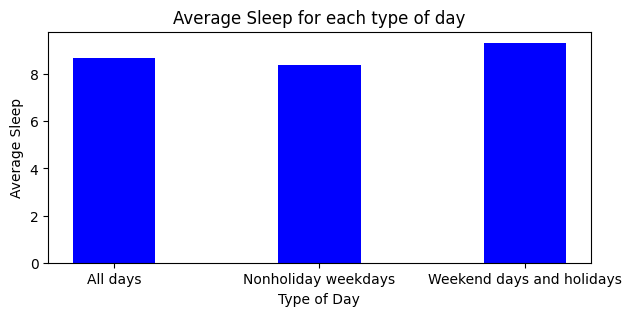

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7, 3))

plt.bar(avg_per_dayType['Type of Days'],avg_per_dayType['avg_sleep'], color ='blue', width = 0.4)

# Recommended: Label axis 
plt.xlabel("Type of Day")
plt.ylabel("Average Sleep")
plt.title("Average Sleep for each type of day")
plt.show()

<Axes: xlabel='Type of Days'>

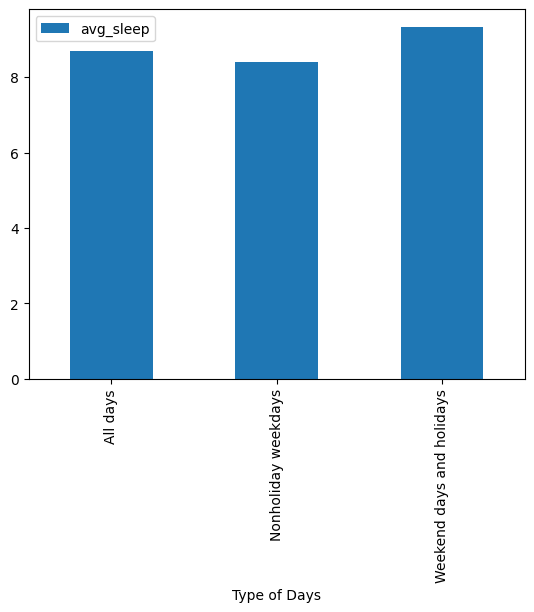

In [34]:
avg_per_dayType.plot(x='Type of Days', y='avg_sleep',kind='bar')

## Line Chart

In [35]:
# Line Chart

df2 = df.groupby(['Type of Days','Sex']).agg(
    avg_sleep=('Avg hrs per day sleeping','mean')
).reset_index()

df2

,Type of Days,Sex,avg_sleep
0,All days,Both,8.682571
1,All days,Men,8.601429
2,All days,Women,8.760286
3,Nonholiday weekdays,Both,8.405524
4,Nonholiday weekdays,Men,8.312286
5,Nonholiday weekdays,Women,8.495238
6,Weekend days and holidays,Both,9.335429
7,Weekend days and holidays,Men,9.281048
8,Weekend days and holidays,Women,9.388000


In [59]:
df2_temp = df2.pivot(index='Type of Days',columns='Sex',values='avg_sleep').reset_index()

df2_temp

Sex,Type of Days,Both,Men,Women
0,All days,8.682571,8.601429,8.760286
1,Nonholiday weekdays,8.405524,8.312286,8.495238
2,Weekend days and holidays,9.335429,9.281048,9.388000


<Axes: title={'center': 'Avg sleep'}, xlabel='Type of Days'>

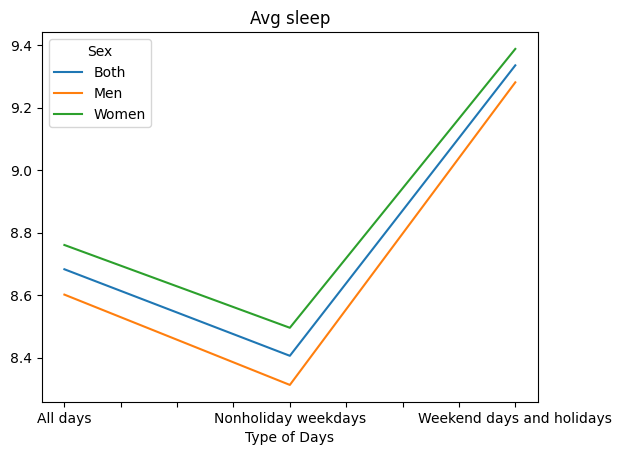

In [62]:
df2_temp.plot(
    x='Type of Days',
    kind='line',
    stacked=False,
    title='Avg sleep'
)

## Scatter Plot

<Axes: title={'center': 'Scatter plot-Avg daily sleep for years'}, xlabel='Year', ylabel='Avg hrs per day sleeping'>

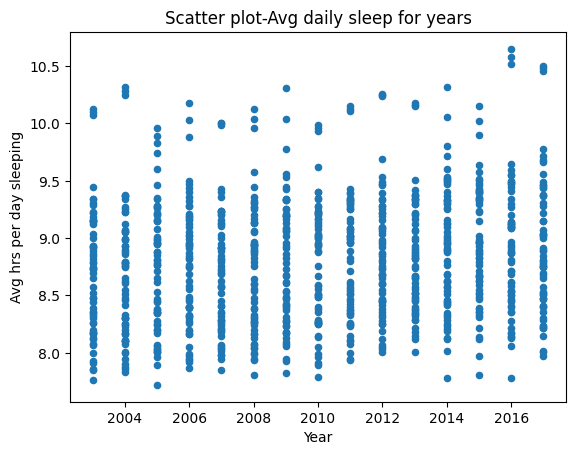

In [68]:
df.plot(x='Year', y='Avg hrs per day sleeping', kind='scatter', title='Scatter plot-Avg daily sleep for years')

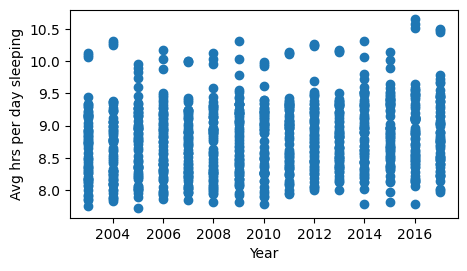

In [69]:
import numpy as np

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter('Year', 'Avg hrs per day sleeping', data=df)
ax.set_xlabel('Year')
ax.set_ylabel('Avg hrs per day sleeping');

## Line Chart with Time

We want to see the change in sleeping patterns for different genders over time

In [72]:
df3 = df.groupby(['Sex','Year']).agg(
    avg_sleep=('Avg hrs per day sleeping','mean')
).reset_index()

df3.head()

,Sex,Year,avg_sleep
0,Both,2003,8.702857
1,Both,2004,8.678571
2,Both,2005,8.745714
3,Both,2006,8.757143
4,Both,2007,8.697619


In [74]:
df3_temp = df3.pivot(index='Year',columns='Sex',values='avg_sleep').reset_index()

df3_temp.head()

Sex,Year,Both,Men,Women
0,2003,8.702857,8.624762,8.778095
1,2004,8.678571,8.623333,8.731429
2,2005,8.745714,8.663333,8.827619
3,2006,8.757143,8.705238,8.811429
4,2007,8.697619,8.656190,8.736190


<Axes: title={'center': 'Sleep Pattern over time for all genders'}, xlabel='Year', ylabel='Avg Sleep'>

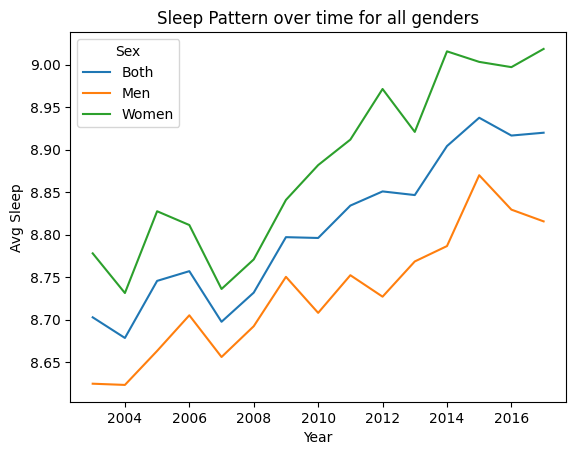

In [77]:
df3_temp.plot(
    x='Year',
    kind='line',
    stacked=False,
    title='Sleep Pattern over time for all genders',
    ylabel='Avg Sleep'
)

### Resources

https://python-graph-gallery.com/

https://matplotlib.org/stable/gallery/index.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# SQL

### 1. Query and Filter Data

```json
Select * from table;
Select * from table where column_name=2;
```

### 2. Sort Data
```json
Select * from table;
Select col1, col2, col3 from table where col4=2 order by 1 asc;
```


### 3. Aggregating (Group)

Select grouping columns e.g. ['Year','Sex']

Select value columns and aggregation function e.g mean('Avg Sleep')

```json
Select * from table;
Select col1, col2, sum(col3) from table group by 1,2 order by 3 desc;
```




---

## Using the Sleeping dataset

### 1. Query and Filter data

```json
select * from "TimeAmericansSpendSleeping";
select * from "TimeAmericansSpendSleeping" where "Sex"<>'Both';
select * from "TimeAmericansSpendSleeping" where "Avg_hrs_per_day_sleeping"::float>8.5;
```


### 2. Sort Data

```json
select "Year", "Avg_hrs_per_day_sleeping" from "TimeAmericansSpendSleeping" order by 1 asc;
select "Year", "Avg_hrs_per_day_sleeping" from "TimeAmericansSpendSleeping" where "Sex"<>'Both' order by 1 asc;
```

### 3. Aggregating

```json

select avg("Avg_hrs_per_day_sleeping"::float) as avg_sleep from "TimeAmericansSpendSleeping";

select avg("Avg_hrs_per_day_sleeping"::float) as avg_sleep from "TimeAmericansSpendSleeping"
where "Sex"='Both';

select avg("Avg_hrs_per_day_sleeping"::float) as avg_sleep from "TimeAmericansSpendSleeping"
where "Year"::INT>2015;

select "Sex", "Year", avg("Avg_hrs_per_day_sleeping"::float) as avg_sleep from "TimeAmericansSpendSleeping"
Group by 1,2 order by 1,2;
```
---


#### Extra

To check data type of columns of a table

```bash
SELECT
    column_name,
    data_type
FROM
    information_schema.columns
WHERE
    table_name = 'TimeAmericansSpendSleeping';
```